# Plot maps of max mixed layer depth

CM2-025, CM2-1, OM2-025, OM2-1, observations

In [1]:
import intake
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cmocean as cm
import cosima_cookbook as cc

In [2]:
from os import environ
environ["PYTHONWARNINGS"] = "ignore"

from dask.distributed import Client

client = Client(threads_per_worker=1)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/43375/status,
Dashboard: /proxy/43375/status,Workers: 28
Total threads: 28,Total memory: 125.19 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37209,Workers: 28
Dashboard: /proxy/43375/status,Total threads: 28
Started: Just now,Total memory: 125.19 GiB
Comm: tcp://127.0.0.1:39253,Total threads: 1
Dashboard: /proxy/35259/status,Memory: 4.47 GiB
Nanny: tcp://127.0.0.1:42295,


#### Define a few things first

In [3]:
# Path to data
path_to_data = '/g/data/x77/wgh581/Post_Process/ACCESS_CM2_025/'
path_to_data_cz861 = '/g/data/x77/wgh581/Post_Process/ACCESS_CM2_025_cz861/'

In [4]:
# CM2 database
session_CM2 = cc.database.create_session('/g/data/p73/archive/non-CMIP/ACCESS-CM2/CM2.db')
#expt_CM2_025 = 'cj877'
expt_CM2_1   = 'bz687'

In [5]:
# OM2 database
session_OM2  = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
expt_OM2_025 = '025deg_jra55_ryf9091_gadi'
expt_OM2_1   = '1deg_jra55_ryf9091_gadi'

In [6]:
# Plotting info
ft_size = 12
plt.rcParams.update({'font.size': ft_size})
fig_path = '/g/data/x77/wgh581/Figures/Figures_ACCESS_CM2/'

In [7]:
# Define colours
CLEX_Red = '#DA1E48'
CLEX_Pink = '#F48580'
CLEX_SkyBlue = '#00BDF2'
CLEX_MidBlue = '#008DD0'
CLEX_CobaldBlue = '#0066B3'
CLEX_MidnightBlue = '#113559'
CLEX_Gray = '#4D4D47'

In [8]:
cat = intake.open_esm_datastore(
    "/g/data/lg87/wgh581/datastore_ACCESS_CM2_025_cz861.json",
    columns_with_iterables=["variable"] # This is important
)

### Import data

Monthly climatology

In [9]:
mld_CM2_025_clim = xr.open_dataarray(path_to_data_cz861 + 'mld_clim_CM2_025_400_499_cz861.nc')

In [10]:
mld_CM2_1_clim = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/mld_clim_CM2_1_400_499.nc')

In [11]:
mld_OM2_025_clim = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_025/mld_clim_OM2_025_2300_2399.nc')

In [12]:
mld_OM2_1_clim = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_1/mld_clim_OM2_1_2300_2399.nc')

#### Import observational mixed layer depth

- 0.03 kg/m3 density threshold criterion
- monthly climatology, 1970-2021

https://www.seanoe.org/data/00806/91774/

In [16]:
mld_obs = xr.open_dataset('/g/data/x77/wgh581/Other_Data/mld_dr003_ref10m.nc')

#### Coordinate information

In [17]:
geolon_t_025 = xr.open_dataset('/g/data/ik11/grids/ocean_grid_025.nc').geolon_t
geolat_t_025 = xr.open_dataset('/g/data/ik11/grids/ocean_grid_025.nc').geolat_t

In [18]:
geolon_t_1 = xr.open_dataset('/g/data/ik11/grids/ocean_grid_10.nc').geolon_t
geolat_t_1 = xr.open_dataset('/g/data/ik11/grids/ocean_grid_10.nc').geolat_t

In [19]:
mld_CM2_025_clim = mld_CM2_025_clim.assign_coords({'geolon_t': geolon_t_025, 'geolat_t': geolat_t_025})
mld_OM2_025_clim = mld_OM2_025_clim.assign_coords({'geolon_t': geolon_t_025, 'geolat_t': geolat_t_025})
mld_CM2_1_clim   = mld_CM2_1_clim.assign_coords({'geolon_t': geolon_t_1, 'geolat_t': geolat_t_1})
mld_OM2_1_clim   = mld_OM2_1_clim.assign_coords({'geolon_t': geolon_t_1, 'geolat_t': geolat_t_1})

### Plotting

In [20]:
# Use cartopy land for now (option to update to model land but will change with resolution)
import cartopy.feature as cft
land_50m = cft.NaturalEarthFeature('physical', 'land', '50m', edgecolor='black', facecolor='darkgrey', linewidth=0.5)

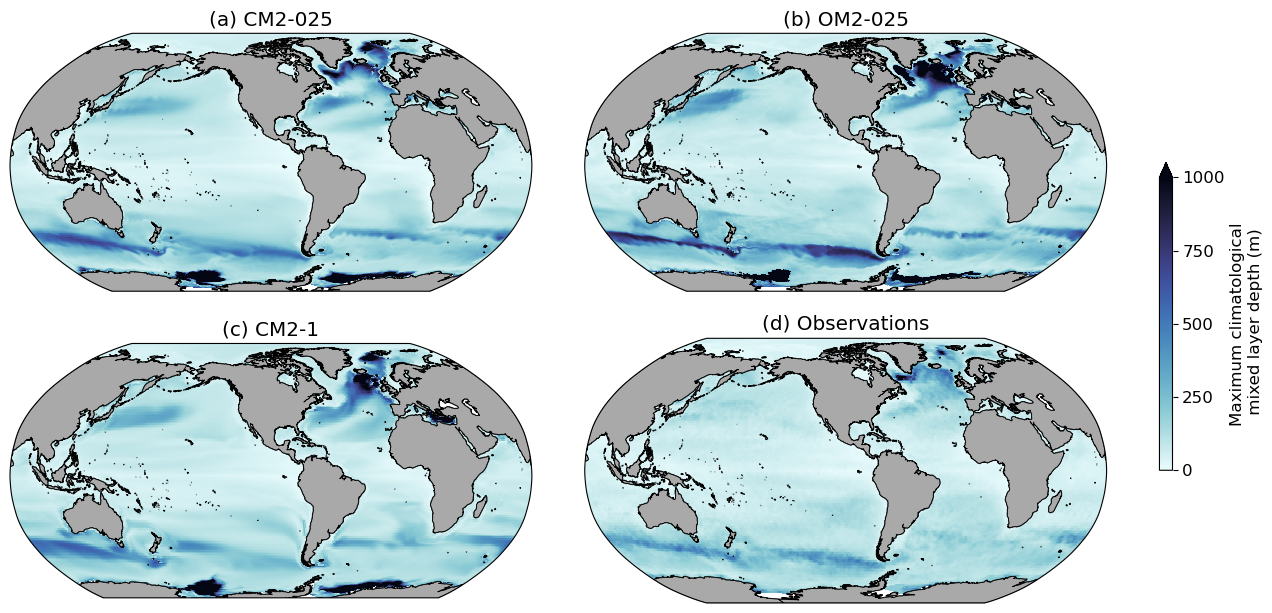

In [22]:
fig = plt.figure(figsize=(15,8))
gs  = gridspec.GridSpec(8, 3, width_ratios=[1, 1, 0.025], hspace=0.01, wspace=0.15)

ax = fig.add_subplot(gs[0:4,0], projection=ccrs.Robinson(central_longitude=-100))
sc = mld_CM2_025_clim.max('month').plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=0, vmax=1000, cmap=cm.cm.ice_r, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('(a) CM2-025')

ax = fig.add_subplot(gs[0:4,1], projection=ccrs.Robinson(central_longitude=-100))
mld_OM2_025_clim.max('month').plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=0, vmax=1000, cmap=cm.cm.ice_r, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('(b) OM2-025')

ax = fig.add_subplot(gs[4:,0], projection=ccrs.Robinson(central_longitude=-100))
mld_CM2_1_clim.max('month').plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=0, vmax=1000, cmap=cm.cm.ice_r, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('(c) CM2-1')

ax = fig.add_subplot(gs[4:,1], projection=ccrs.Robinson(central_longitude=-100))
#mld_OM2_1_clim.mean('month').plot(x='xt_ocean', y='yt_ocean', transform=ccrs.PlateCarree(), vmin=0, vmax=1000, cmap=cm.cm.ice_r, add_colorbar=False)
mld_obs.mld_dr003.max('time').plot(transform=ccrs.PlateCarree(), vmin=0, vmax=1000, cmap=cm.cm.ice_r, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('(d) Observations')

cbar_ax = fig.add_subplot(gs[2:6, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, ticks=np.arange(0, 1100, 250), label='Maximum climatological\n mixed layer depth (m)', extend='max')

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig5_mld_max_map_cz861.png'
    plt.savefig(fig_path + fig_name, dpi=300, bbox_inches='tight', facecolor='white');